## 4.1 데이터 종류
### 4.1.1 수치형 데이터 : 사칙 연산이 가능한 데이터
- 연속형 데이터 : 값이 끊기지 않고 연속된 데이터, 실수로 표현할 수 있는 데이터(키)
- 이산형 데이터 : 정수로 딱 떨어져 셀 수 있는 데이터(페이지 수)

### 4.1.2 범주형 데이터 : 사칙연산 불가능
- 순서형 데이터 : 순위를 매길 수 있는 데이터(학점)
- 명목형 데이터 : 순위가 따로 없는 데이터 (성별, 우편번호)

## 4.3 수치형 데이터 시각화

In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 4.3.1 히스토그램 : 수치형 데이터의 구간별 빈도수

<AxesSubplot:xlabel='age', ylabel='Count'>

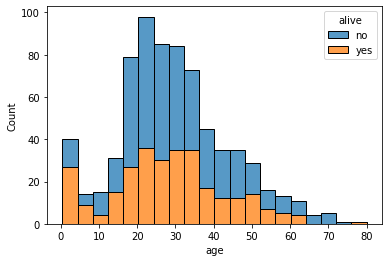

In [4]:
sns.histplot(data=titanic, x='age', bins=20, hue='alive', multiple='stack')

### 4.3.2 커널밀도추정 함수 그래프 
- 히스토그램을 매끄럽게 곡선으로 연결한 그래프, 많이 쓰지는 않음

<AxesSubplot:xlabel='age', ylabel='Density'>

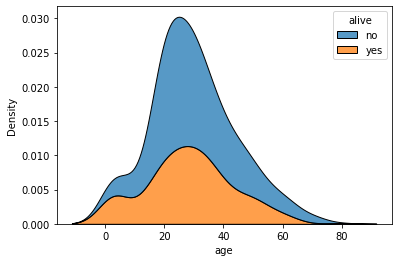

In [5]:
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack')

### 4.3.3 분포도 (displot)
- 파라미터만 조정하면 histplot과 kdeplot이 제공하는 기본 그래프 모두 그릴 수 있음

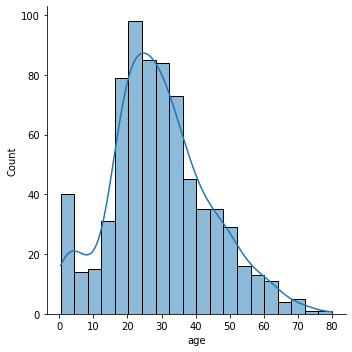

In [6]:
sns.displot(data=titanic, x='age', kde=True)

### 4.3.4 러그플롯
- 주변분포 나타냄
- 단독 보다는 다른 분포도 그래프와 함께 사용 : 단일 피처(age)가 어떻게 분포되어 있는지 작은 선분으로 표시

<AxesSubplot:xlabel='age', ylabel='Density'>

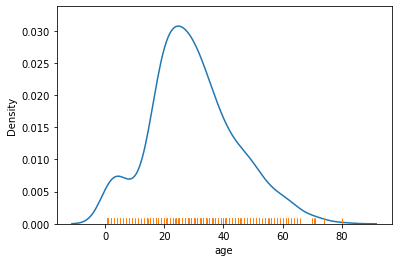

In [8]:
# 단일 피처(age)가 어떻게 분포되어 있는지 작은 선분으로 표시
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age')

## 4.4 범주형 데이터 시각화
### 4.4.1 막대그래프
- 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지
- barplot : 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그려줌 (평균은 막대높이[샘플링 데이터 평균], 신뢰구간은 오차막대)


<AxesSubplot:xlabel='class', ylabel='fare'>

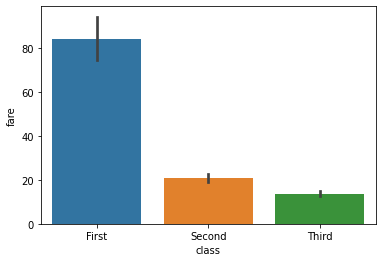

In [9]:
sns.barplot(x='class', y='fare', data=titanic)

### 4.4.2 포인트플롯
- 막대그래프와 동일 기능
- 점과 선으로 표현하기 때문에 여러 그래프를 그려도 서로 잘 보이고, 비교하기도 쉽다

<AxesSubplot:xlabel='class', ylabel='fare'>

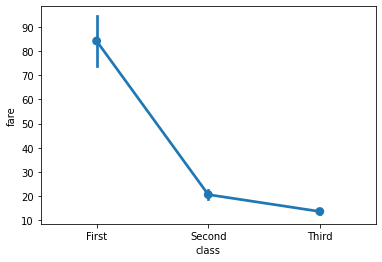

In [10]:
sns.pointplot(x='class', y='fare', data=titanic)

### 4.4.3 박스 플롯
- Q1, Q2, Q3 : 25%, 50%, 75%
- IQR = Q3 - Q1
- 최대값 : Q3 + (1.5 * IQR)
- 최솟값 : Q1 - (1.5 * IQR)

<AxesSubplot:xlabel='class', ylabel='age'>

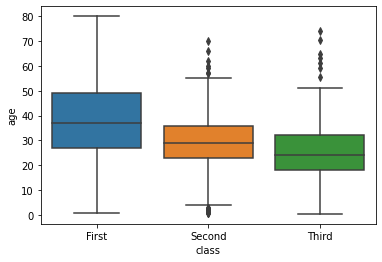

In [11]:
sns.boxplot(x='class', y='age', data=titanic)

### 4.4.4 바이올린 플롯
- 박스플롯 + 커널밀도추정 함수

<AxesSubplot:xlabel='class', ylabel='age'>

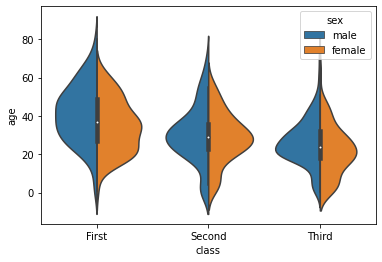

In [12]:
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split=True)

### 4.4.5 카운트플롯
- 범주형 데이터의 개수 확인 : 범주형 피처나 범주형 타깃값의 분포가 어떤지 파악하는 용도
- 피처를 범주형 데이터 하나만 받음

<AxesSubplot:xlabel='count', ylabel='class'>

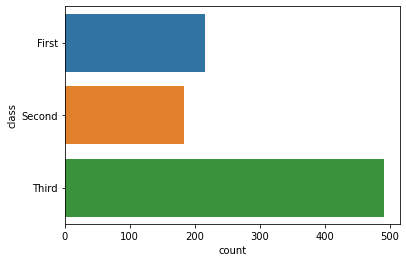

In [14]:
sns.countplot(y='class', data=titanic)

### 4.4.6 파이 그래프 
- 범주형 데이터별 비율을 알아보기 우ㅟ함

([<matplotlib.patches.Wedge at 0x7f8049ac8890>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

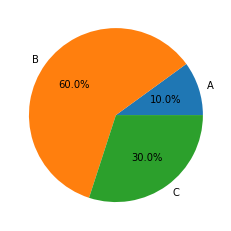

In [15]:
import matplotlib.pyplot as plt
x = [10,60,30]
labels = ['A', 'B', 'C']

plt.pie(x=x, labels=labels, autopct='%.1f%%')

## 4.5 데이터 관계 시각화
### 4.5.1 히트맵
- 데이터 간 관계를 색상으로 표현
- 비교할 데이터가 많을 때 수로 사용
- pivot 함수를 사용하여 index와 columns 파라미터에 전달한 피처를 각각 행과 열로 지정하고, values 파라미터에 전달한 피처를 합한 표 반환

In [16]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [18]:
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

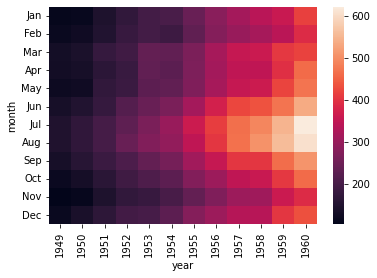

In [19]:
sns.heatmap(data=flights_pivot)

### 4.5.2 라인플롯
- 두 수치형 데이터 사이의 관계 : 전달한 값의 평균과 95% 신뢰구간

<AxesSubplot:xlabel='year', ylabel='passengers'>

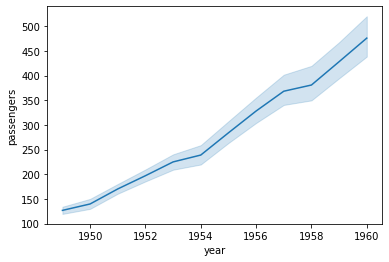

In [21]:
sns.lineplot(x='year', y='passengers', data=flights)

### 4.5.3 산점도
- 두 데이터간의 관계를 점으로 표현

In [23]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

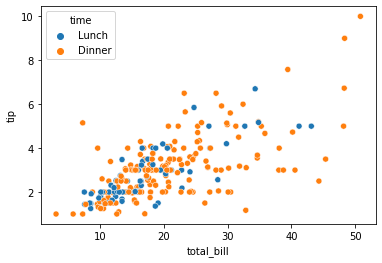

In [25]:
sns.scatterplot(x='total_bill',y='tip', hue='time', data=tips)

### 4.5.4 회귀선을 포함한 산점도 그래프
- 선형 회귀선 포함

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

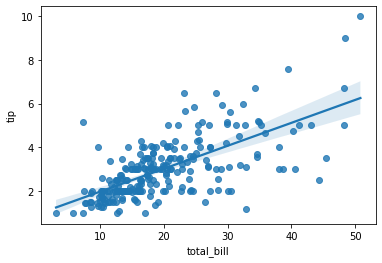

In [27]:
sns.regplot(x='total_bill', y='tip', data=tips)